In [1]:
#%% Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import the chaosmagpy module
from chaosmagpy.model_utils import design_gauss, synth_values

In [2]:
# how to load data

# load IGRF model parameters
m = np.loadtxt('IGRF13-2020.txt')

# load SWARM data with pandas
swarm = pd.read_csv("SWARM_data.csv")
swarm.columns = ['theta', 'phi', 'radius', 'Bt', 'Bp', 'Br']

Text(0.5, 0, 'theta')

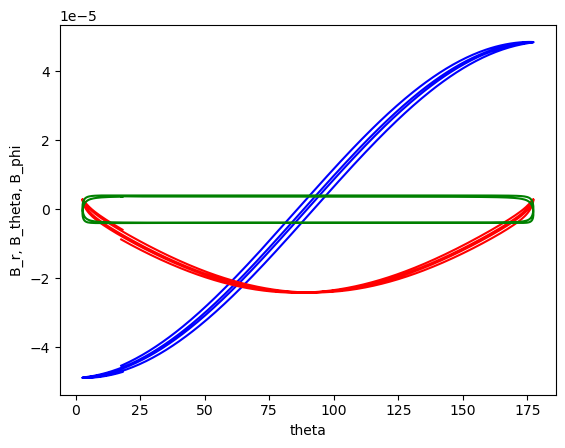

In [3]:
k = np.pi/180

g_10 = -29404.8*10**(-9) #nT convertert til tesla(T)
g_11 = -1450.9*10**(-9) #nT convertert til tesla(T)
h_11 = 4652.5*10**(-9) #nT convertert til tesla(T)
R = 6371000 #m

B_r = 2*R**3/(swarm.radius**3)*(g_10*np.cos(swarm.theta*k)+(g_11*np.cos(swarm.phi*k)+h_11*np.sin(swarm.phi*k))*np.sin(swarm.theta*k))

B_theta = -R**3/(swarm.radius**3)*(-g_10*np.sin(swarm.theta*k)+(g_11*np.cos(swarm.phi*k)+h_11*np.sin(swarm.phi*k))*np.cos(swarm.theta*k))

B_phi =-R**3/(swarm.radius**3)*(-g_11*np.sin(swarm.phi*k)+h_11*np.cos(swarm.phi*k))

plt.figure()
plt.plot(swarm.theta,B_r, color = "blue")
plt.plot(swarm.theta,B_theta, color = "red")
plt.plot(swarm.theta,B_phi, color = "green")

plt.ylabel('B_r, B_theta, B_phi')
plt.xlabel('theta')